In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [2]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    a = tx.T.dot(tx)
    b = tx.T.dot(y)
    return np.linalg.solve(a, b)

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [3]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    weight = least_squares(y, tx)
    print(weight)



Test it here

In [4]:
test_your_least_squares()

[73.293922   13.47971243]


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [13]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [59]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    poly = np.ones((len(x), 1), dtype=float)
    for deg in range(1, degree+1):
        poly = np.c_[poly, np.power(x, deg)]
    return poly

In [55]:
build_poly(x,12)[:,11]

array([1.04005129e-05, 3.86722988e+07, 9.58575345e+02, 9.87135831e+05,
       6.59657660e+05, 3.18186108e-02, 3.04837282e+06, 1.88119287e+08,
       6.02529829e+08, 1.33352445e+04, 3.95670101e-03, 1.45628527e+06,
       1.83435880e-01, 2.35873086e+04, 1.93944361e+02, 1.13820138e+08,
       4.82013301e+08, 3.83824262e+08, 3.01525448e-04, 1.11399616e+05,
       1.59546254e+07, 8.31008832e-01, 3.13616447e+00, 1.00000000e-11,
       3.86757647e+03, 2.98887775e+01, 4.33256660e+06, 2.39835219e+08,
       8.47612915e+06, 1.02563688e+01, 7.30764014e+03, 1.96847189e+03,
       7.92193576e+01, 2.16036249e+07, 1.16819711e+07, 1.78654188e+05,
       7.92781769e-08, 8.77519233e+07, 5.11667809e+07, 1.46747954e+08,
       4.05644263e+04, 2.90159156e+07, 2.80993396e+05, 4.43855041e+02,
       2.12006859e+06, 4.34110823e+05, 3.04168240e+08, 6.09107148e+06,
       6.80063434e+04, 6.72292470e+07])

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [58]:
from costs import compute_mse
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # form dataset to do polynomial regression.
        tx = build_poly(x, degree)
        # least squares
        weights = least_squares(y, tx)
        # compute RMSE
        rmse = np.sqrt(2 * compute_mse(y, tx, weights))
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

[ 0.83431835 -0.28976617]
Processing 1th experiment, degree=1, rmse=0.47187607963421874
[-0.11521169  1.58466469 -0.76372992  0.08215316]
Processing 2th experiment, degree=3, rmse=0.25858277667737506
[ 3.22356468e-01 -4.05990188e-01  1.64303565e+00 -1.12131791e+00
  2.72479674e-01 -2.25108750e-02 -7.79999268e-04  1.53902667e-04]
Processing 3th experiment, degree=7, rmse=0.24965870360907413
[ 1.10369121e+00 -1.14888199e+01  5.10136080e+01 -1.03979580e+02
  1.19495381e+02 -8.43803991e+01  3.83650578e+01 -1.14982381e+01
  2.27749898e+00 -2.91909600e-01  2.28883919e-02 -9.68191159e-04
  1.58550450e-05]
Processing 4th experiment, degree=12, rmse=0.240882577716907


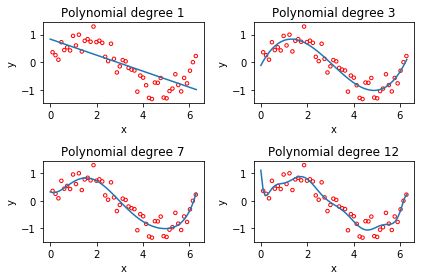

In [60]:
polynomial_regression()

# 2 Evaluating model predication performance

Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [64]:
def split_data(x, y, ratio, seed=1):
    """split the dataset based on the split ratio."""
    # set seed
    np.random.seed(seed)
    # generate random indices
    num_row = len(y)
    indices = np.random.permutation(num_row)
    index_split = int(np.floor(ratio * num_row))
    index_tr = indices[: index_split]
    index_te = indices[index_split:]
    # create split
    x_tr = x[index_tr]
    x_te = x[index_te]
    y_tr = y[index_tr]
    y_te = y[index_te]
    return x_tr, x_te, y_tr, y_te

Then, test your `split_data` function below.

In [71]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    x_tr, x_te, y_tr, y_te = split_data(x, y, ratio, seed)
    # form tx
    tx_tr = build_poly(x_tr, degree)
    tx_te = build_poly(x_te, degree)
    print(x_tr)

    weight = least_squares(y_tr, tx_tr)

    # calculate RMSE for train and test data.
    rmse_tr = np.sqrt(2 * compute_mse(y_tr, tx_tr, weight))
    rmse_te = np.sqrt(2 * compute_mse(y_te, tx_te, weight))

    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))

Demo time

In [72]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

[5.14749821 2.6237491  5.02131076 0.1        5.65224803 0.35237491
 3.88562366 4.39037348 1.61424946 1.99281183 2.74993656 2.11899928
 2.87612401 3.50706129 4.76893584 4.26418602 1.74043692 2.24518674
 4.13799857 6.0308104  0.98331219 1.2356871  5.52606058 0.47856237
 1.10949964 3.7594362  5.27368567 0.73093728 1.48806201 5.77843549
 5.90462294 0.85712473 1.86662437 6.28318531 0.22618746 3.38087384
 4.64274839 4.01181111 2.49756165 3.63324875 4.8951233  1.36187455
 6.15699785 3.25468638 5.39987312]
proportion=0.9, degree=1, Training RMSE=0.494, Testing RMSE=0.181
[5.14749821 2.6237491  5.02131076 0.1        5.65224803 0.35237491
 3.88562366 4.39037348 1.61424946 1.99281183 2.74993656 2.11899928
 2.87612401 3.50706129 4.76893584 4.26418602 1.74043692 2.24518674
 4.13799857 6.0308104  0.98331219 1.2356871  5.52606058 0.47856237
 1.10949964 3.7594362  5.27368567 0.73093728 1.48806201 5.77843549
 5.90462294 0.85712473 1.86662437 6.28318531 0.22618746 3.38087384
 4.64274839 4.01181111 2.497

# Ridge Regression
Please fill in the function below.

In [73]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    aI = 2 * tx.shape[0] * lambda_ * np.identity(tx.shape[1])
    a = tx.T.dot(tx) + aI
    b = tx.T.dot(y)
    return np.linalg.solve(a, b)

In [74]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # split data
    x_tr, x_te, y_tr, y_te = split_data(x, y, ratio, seed)
    # form tx
    tx_tr = build_poly(x_tr, degree)
    tx_te = build_poly(x_te, degree)

    # ridge regression with different lambda
    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ridge regression
        weight = ridge_regression(y_tr, tx_tr, lambda_)
        rmse_tr.append(np.sqrt(2 * compute_mse(y_tr, tx_tr, weight)))
        rmse_te.append(np.sqrt(2 * compute_mse(y_te, tx_te, weight)))

        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

Demo time

proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.338
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.337
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.336
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.335
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.228, Testing RMSE=0.334
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.228, Testing RMSE=0.333
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.229, Testing RMSE=0.329
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.230, Testing RMSE=0.319
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.232, Testing RMSE=0.302
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.237, Testing RMSE=0.283
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.246, Testing RMSE=0.276
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.264, Testing RMSE=0.298
proportion=0.5, degree=7, lambda=0.193, 

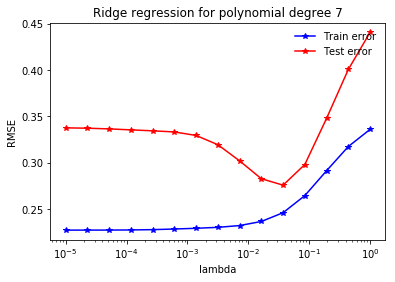

In [75]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)